In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
ls gdrive

'My Drive'/


In [0]:
import os
os.chdir("/content/gdrive/My Drive/CS598")

# Copy data to local dir

In [0]:
!mkdir /localdata
!cp -r -a -n data/RADVESS/ /localdata
!cp -r -a -n data/AudioData/ /localdata
!cp -r -a -n data/TESS/ /localdata



In [0]:
ls /localdata/TESS

'TESS Toronto emotional speech set data'/


In [0]:
!pip3 install torch torchvision
!pip3 install librosa

In [0]:
!pip3 install torch torchvision torchsummary

Make sure that pytorch is installed and works with GPU:

In [0]:
import torch
a = torch.Tensor([1]).cuda()
print(a)


tensor([1.], device='cuda:0')


In [0]:
import numpy as np
import scipy.linalg as lg
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy
import sys
import os
from random import shuffle
import librosa
import librosa.display
import math

In [0]:
torch.cuda.is_available()

True

In [0]:
data_names = []
data_labels = []
data_mfccs = []
test_feature = []
test_label = []

In [0]:
emotionDict = {'happy': 0, 'sad': 1, 'angry': 2, 'fearful': 3}

for dirs in os.listdir('/localdata/RADVESS/'):
    # If file is not directory, continue
    if os.path.isdir('/localdata/RADVESS/'+ dirs):
      files = os.listdir('/localdata/RADVESS/'+ dirs)
    else:
      continue
    if dirs[0:5] != 'Actor':
      continue
    inTest = False
    if(dirs == 'Actor_01' or dirs =='Actor_02' or dirs == 'Actor_03' or dirs == 'Actor_04'):
      inTest = True
    for file in files:
        f = file.split('-')
        inEmotion = False
        # if int(f[6][:2]) % 2 == 1: 
        if(f[2]=='03'):
            if inTest == True:
              test_label.append(emotionDict['happy'])
            else:
              data_labels.append(emotionDict['happy'])
            inEmotion = True
        elif(f[2]=='04'):
            if inTest == True:
              test_label.append(emotionDict['sad'])
            else:
              data_labels.append(emotionDict['sad'])
            inEmotion = True
        elif(f[2]=='05'):
            if inTest == True:
              test_label.append(emotionDict['angry'])
            else:
              data_labels.append(emotionDict['angry'])
            inEmotion = True
        elif(f[2]=='06'):
            if inTest == True:
              test_label.append(emotionDict['fearful'])
            else:
              data_labels.append(emotionDict['fearful'])
            inEmotion = True
        if inEmotion == True:
            data_names.append(file)
            # load data
            data, sample_rate = librosa.load('/localdata/RADVESS/'+dirs+'/'+ file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5) # data is 110250
            # get mfcc features
            mfccs = librosa.feature.mfcc(y=data.astype(dtype=float), sr=sample_rate, n_mfcc=13) # 13 x 216
            while mfccs.shape[1] < 216:
              mfcc = np.concatenate((mfccs, mfccs), axis=1)
              mfccs = mfcc[:,:216]
            if inTest == True:
              test_feature.append(mfccs)
            else:
              data_mfccs.append(mfccs)

In [0]:
len(data_mfccs)

640

In [0]:
for dirs in os.listdir('/localdata/TESS/TESS Toronto emotional speech set data/'):
  files = os.listdir('/localdata/TESS/TESS Toronto emotional speech set data/' + dirs)
  for file in files:
    inEmotion = False
    f = file.split('_')
    f = f[2].split('.')
    if f[0] == 'happy':
      data_labels.append(emotionDict['happy'])
      inEmotion = True
    elif f[0] == 'angry':
      data_labels.append(emotionDict['angry'])
      inEmotion = True
    elif f[0] == 'fear':
      data_labels.append(emotionDict['fearful'])
      inEmotion = True
    elif f[0] == 'sad':
      data_labels.append(emotionDict['sad'])
      inEmotion = True
    if inEmotion == True:
      #data_names.append(file)
      # load data
      data, sample_rate = librosa.load('/localdata/TESS/TESS Toronto emotional speech set data/'+dirs+'/'+ file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5) # data is 110250
      # get mfcc features
      mfccs = librosa.feature.mfcc(y=data.astype(dtype=float), sr=sample_rate, n_mfcc=13) # 13 x 216
      while mfccs.shape[1] < 216:
        mfcc = np.concatenate((mfccs, mfccs), axis=1)
        mfccs = mfcc[:,:216]
      data_mfccs.append(mfccs)

In [0]:

for dirs in os.listdir('/localdata/AudioData/'):
  if os.path.isdir('/localdata/AudioData/'+ dirs):
    files = os.listdir('/localdata/AudioData/'+ dirs)
  else:
    continue
  inTest = False
  # if(dirs == 'DC'):
  #   inTest = True
  for file in files:
    inEmotion = False
    if file[0] == 'h':
      if inTest == True:
        test_label.append(emotionDict['happy'])
      else:
        data_labels.append(emotionDict['happy'])
      inEmotion = True
    elif file[0] == 'a':
      if inTest == True:
        test_label.append(emotionDict['angry'])
      else:
        data_labels.append(emotionDict['angry'])
      inEmotion = True
    elif file[0] == 'f':
      if inTest == True:
        test_label.append(emotionDict['fearful'])
      else:
        data_labels.append(emotionDict['fearful'])
      inEmotion = True
    elif file[0:2] == 'sa':
      if inTest == True:
        test_label.append(emotionDict['sad'])
      else:
        data_labels.append(emotionDict['sad'])
      inEmotion = True
    if inEmotion == True:
      # data_names.append(file)
      # load data
      data, sample_rate = librosa.load('/localdata/AudioData/'+dirs+'/'+ file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5) # data is 110250
      # get mfcc features
      mfccs = librosa.feature.mfcc(y=data.astype(dtype=float), sr=sample_rate, n_mfcc=13) # 13 x 216
      while mfccs.shape[1] < 216:
        mfcc = np.concatenate((mfccs, mfccs), axis=1)
        mfccs = mfcc[:,:216]
      if inTest == True:
        test_feature.append(mfccs)
      else:
        data_mfccs.append(mfccs)
    

In [0]:
# Convert 2d mfcc features to 1d
features = data_mfccs # (216,)
# features = features.astype(dtype='double')
print(len(features), features[0].shape, len(data_names), len(data_labels))


2480 (13, 216) 768 2480


In [0]:
len(test_feature)

128

In [0]:
# shuffle data
# z = list(zip(features, data_labels))
rang = np.arange(0, len(features))
shuffle(rang)
shuffled_features = [features[i] for i in rang]
shuffle_data_labels = [data_labels[i] for i in rang]

# split data into train and test set
totLen = len(features)
train_feature = shuffled_features[0:int(totLen*0.9)]
# test_feature = shuffled_features[int(totLen*0.8):int(totLen*0.9)]
val_feature = shuffled_features[int(totLen*0.9):]

train_label = shuffle_data_labels[0:int(totLen*0.9)]
# test_label = shuffle_data_labels[int(totLen*0.8):int(totLen*0.9)]
val_label = shuffle_data_labels[int(totLen*0.9):]
print(len(train_feature),len(test_feature),len(train_label),len(test_label),len(val_feature), len(val_label))
# Convert list to array
train_feature = np.rollaxis(np.dstack(train_feature),-1)
test_feature = np.rollaxis(np.dstack(test_feature),-1)
val_feature = np.rollaxis(np.dstack(val_feature),-1)
print((train_feature.shape), train_feature[0].shape, test_feature.shape, val_feature.shape)

2232 128 2232 128 248 248
(2232, 13, 216) (13, 216) (128, 13, 216) (248, 13, 216)


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.utils.data
# import torchvision
# import torchvision.transforms as transforms

from torch.autograd import Variable
IS_GPU = True


In [0]:
class BaseNet(nn.Module):
    def __init__(self):
        super(BaseNet, self).__init__()
    
        self.conv_net = nn.Sequential(
            nn.Conv1d(13, 256, kernel_size=5, padding=2), # (216 + 2*2 - 1*(5-1) - 1)/1+1= 216
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3), # 216/3=72
            
            nn.Conv1d(256, 512, kernel_size=5, padding=2), # (216 + 2*2 - 1*(5-1) - 1)/1+1= 216
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3), # 72/3=24
            
            nn.Dropout(p=0.1),

            nn.Conv1d(512, 512, kernel_size=5, padding=2), # (216 + 2*2 - 1*(5-1) - 1)/1+1= 216
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3), # 24/3=8

            nn.Conv1d(512, 512, kernel_size=5, padding=2), # (216 + 2*2 - 1*(5-1) - 1)/1+1= 216
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2), # 8/2=4
            
            nn.Flatten(),


        )

        # Add more linear (fc) layers
        # Add normalization layers after linear and
        # experiment inserting them before or after ReLU (nn.BatchNorm1d)
        
        self.fc_net = nn.Sequential(
            # nn.Linear(4*1024, 2*1024),
            # nn.ReLU(inplace=True),
            # nn.BatchNorm1d(2*1024),

            # nn.Linear(2*256, 256),
            # nn.ReLU(inplace=True),
            # nn.BatchNorm1d(256),


            nn.Linear(512*4, 4),
            nn.BatchNorm1d(4),
            # nn.Softmax(),
        )

    def forward(self, x):
        x = self.conv_net(x)
        x = self.fc_net(x)
        return x

# Create an instance of the nn.module class defined above:
net = BaseNet()
net = net.float()
if IS_GPU:
    net = net.cuda()

In [0]:
from torchsummary import summary
summary(net, (13,216), 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [32, 256, 216]          16,896
       BatchNorm1d-2             [32, 256, 216]             512
              ReLU-3             [32, 256, 216]               0
         MaxPool1d-4              [32, 256, 72]               0
            Conv1d-5              [32, 512, 72]         655,872
       BatchNorm1d-6              [32, 512, 72]           1,024
              ReLU-7              [32, 512, 72]               0
         MaxPool1d-8              [32, 512, 24]               0
           Dropout-9              [32, 512, 24]               0
           Conv1d-10              [32, 512, 24]       1,311,232
      BatchNorm1d-11              [32, 512, 24]           1,024
             ReLU-12              [32, 512, 24]               0
        MaxPool1d-13               [32, 512, 8]               0
           Conv1d-14               [32,

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

# optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
optimizer = optim.RMSprop(net.parameters(), lr=0.00001, weight_decay=1e-6)
# optimizer = optim.Adadelta(net.parameters(),lr=0.002)

plt.ioff()
fig = plt.figure()
train_loss_over_epochs = []
val_accuracy_over_epochs = []

In [0]:
def calculate_val_accuracy(is_gpu):
    correct = 0.
    total = 0.
    predictions = []

    class_correct = list(0. for i in range(4))
    class_total = list(0. for i in range(4))

    for i in range(math.ceil(test_feature.shape[0]/n_batches)):
    # Local batches and labels
      if (i+1)*n_batches > test_feature.shape[0]:
          testData, labels = val_feature[i*n_batches:,:], val_label[i*n_batches:]
      else:
          testData, labels = val_feature[i*n_batches:(i+1)*n_batches,:], val_label[i*n_batches:(i+1)*n_batches]

      inputs = torch.from_numpy(testData)
      #inputs = torch.unsqueeze(testData,1)
      labels = torch.from_numpy(np.array(labels))

      if IS_GPU:
          inputs = inputs.cuda()
          labels = labels.cuda()

      inputs = Variable((inputs))
      labels = Variable(((labels)))
      
      outputs = net(inputs.float())
      _, predicted = torch.max(outputs.data, 1)
      predictions.extend(list(predicted.cpu().numpy()))

      total += labels.size(0)
      correct += (predicted == labels).sum()

      c = (predicted == labels).squeeze()
      for i in range(len(labels)):
          label = labels[i]
          class_correct[label] += c[i]
          class_total[label] += 1

    class_accuracy = 100 * np.divide(class_correct, class_total)
    return 100*correct/total, class_accuracy

[1] loss: 0.753
Accuracy of the network on the val images: 80 %
[2] loss: 0.558
Accuracy of the network on the val images: 81 %
[3] loss: 0.501
Accuracy of the network on the val images: 83 %
[4] loss: 0.472
Accuracy of the network on the val images: 85 %
[5] loss: 0.441
Accuracy of the network on the val images: 85 %
[6] loss: 0.417
Accuracy of the network on the val images: 84 %
[7] loss: 0.405
Accuracy of the network on the val images: 85 %
[8] loss: 0.389
Accuracy of the network on the val images: 87 %
[9] loss: 0.379
Accuracy of the network on the val images: 87 %
[10] loss: 0.369
Accuracy of the network on the val images: 87 %
[11] loss: 0.360
Accuracy of the network on the val images: 85 %
[12] loss: 0.356
Accuracy of the network on the val images: 88 %
[13] loss: 0.352
Accuracy of the network on the val images: 88 %
[14] loss: 0.342
Accuracy of the network on the val images: 90 %
[15] loss: 0.340
Accuracy of the network on the val images: 90 %
[16] loss: 0.335
Accuracy of the n

<Figure size 432x288 with 0 Axes>

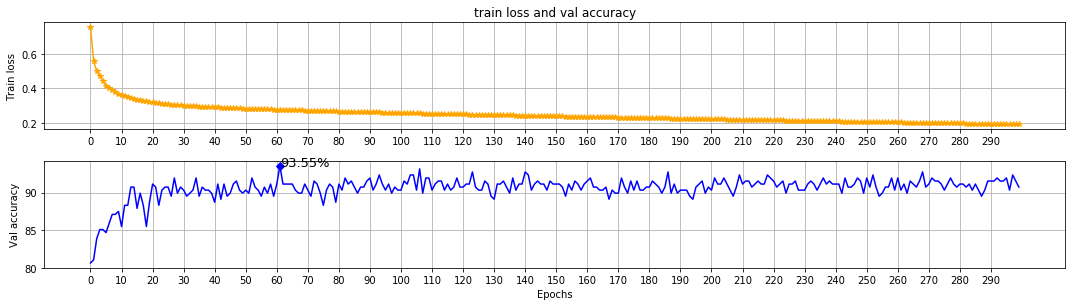

Finished Training


In [0]:
# Train the network
n_batches = 30
EPOCHS = 300

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(math.ceil(train_feature.shape[0]/n_batches)):
        # Local batches and labels
        if (i+1)*n_batches > train_feature.shape[0]:
            inputs, labels = train_feature[i*n_batches:,:], train_label[i*n_batches:]
        else:
            inputs, labels = train_feature[i*n_batches:(i+1)*n_batches,:], train_label[i*n_batches:(i+1)*n_batches]

        inputs = torch.from_numpy(inputs)
        # print(inputs.shape)
        labels = torch.from_numpy(np.array(labels))

        if IS_GPU:
            inputs = inputs.cuda()
            labels = labels.cuda()

        # wrap them in Variable
        inputs = Variable((inputs))
        labels = Variable(((labels)))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        # inputs = torch.unsqueeze(inputs,1)
        outputs = net(inputs.float())
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    
    # Normalizing the loss by the total number of train batches
    running_loss/=int(train_feature.shape[0]/n_batches)+1
    print('[%d] loss: %.3f' %
          (epoch + 1, running_loss))

    # Scale of 0.0 to 100.0
    # Calculate validation set accuracy of the existing model
    val_accuracy, val_classwise_accuracy = \
        calculate_val_accuracy(IS_GPU)
    print('Accuracy of the network on the val images: %d %%' % (val_accuracy))

    train_loss_over_epochs.append(running_loss)
    val_accuracy_over_epochs.append(val_accuracy)

f, axes = plt.subplots(2, 1, figsize=(15,4))
f.tight_layout()
# plt.subplot(2, 1, 1)
axes[0].set_ylabel('Train loss')
axes[0].plot(np.arange(EPOCHS), train_loss_over_epochs, '-*', color='orange')
axes[0].set_title('train loss and val accuracy')
axes[0].set_xticks(np.arange(EPOCHS, dtype=int, step=10))
axes[0].grid(True)
axes[0].figure.savefig("loss.png")

acc_lst = [x.item() for x in val_accuracy_over_epochs]
max_idx = np.argmax(acc_lst)
# plt.subplot(2, 1, 2, figsize=(20,4))
markers_on = [max_idx]
axes[1].autoscale(axis='y')
axes[1].plot(np.arange(EPOCHS), val_accuracy_over_epochs, '-bD', markevery=markers_on)
axes[1].text(max_idx, val_accuracy_over_epochs[max_idx].item(), str(format(val_accuracy_over_epochs[max_idx].item(), ".2f")+"%"), fontsize=13)
axes[1].set_ylabel('Val accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_xticks(np.arange(EPOCHS, dtype=int, step=10))
axes[1].grid(True)
axes[1].figure.savefig("accuracy.png")
# axes[1].close(fig)
plt.show()
print('Finished Training')


class_accuracy [tensor(81.2500, device='cuda:0') tensor(75., device='cuda:0')
 tensor(84.3750, device='cuda:0') tensor(81.2500, device='cuda:0')]
accuracy 0.8046875
C [[26.  6.  4.  1.]
 [ 3. 24.  1.  4.]
 [ 2.  0. 27.  1.]
 [ 1.  2.  0. 26.]]


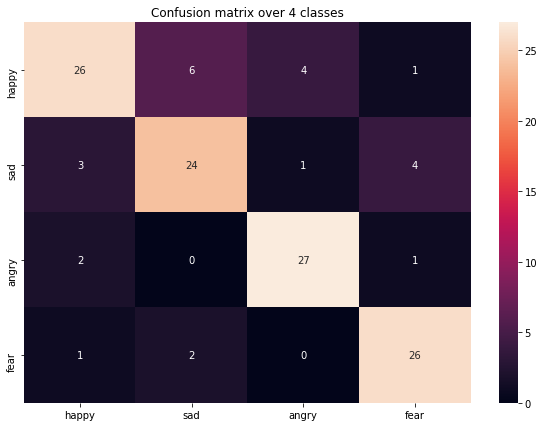

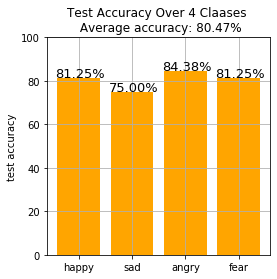

In [0]:
net.eval()



total = 0
predictions = []
n_batches = 16
# for i in range(test_feature.shape[0]):
correct = 0.
total = 0.
predictions = []
TOTAL_CLASSES = 4
class_correct = list(0. for i in range(TOTAL_CLASSES))
class_total = list(0. for i in range(TOTAL_CLASSES))

for i in range(math.ceil(test_feature.shape[0]/n_batches)):
  # Local batches and labels
  if (i+1)*n_batches > test_feature.shape[0]:
      testData, labels = test_feature[i*n_batches:,:], test_label[i*n_batches:]
  else:
      testData, labels = test_feature[i*n_batches:(i+1)*n_batches,:], test_label[i*n_batches:(i+1)*n_batches]

  # testData, label = test_feature, test_label

  testData = torch.from_numpy(testData)
  labels = torch.from_numpy(np.array(labels))

  if IS_GPU:
    testData = testData.cuda()
    labels = labels.cuda()

  testData = Variable(testData)
  outputs = net(testData.float())
  _, predicted = torch.max(outputs.data, 1)
  predictions.extend(list(predicted.cpu().numpy()))
  # total += label.size(0)

  correct += (predicted == labels).sum()
  c = (predicted == labels).squeeze()
  for i in range(len(labels)):
      label = labels[i]
      class_correct[label] += c[i]
      class_total[label] += 1

acc = 0
for l_i, label in enumerate(predictions):
    if label == test_label[l_i]:
        acc += 1
    # print([str(l_i), str(label)], test_label[l_i])
class_accuracy = 100 * np.divide(class_correct, class_total)
print("class_accuracy", class_accuracy)
print("accuracy", acc/len(test_label))


import pandas as pd
import seaborn as sn

C = np.histogram2d(predictions, test_label, bins=4)[0]
print("C", C)
my_xticks = ['happy','sad','angry','fear']

df_cm = pd.DataFrame(C, index=[i for i in my_xticks], columns=[i for i in my_xticks])
plt.figure(figsize = (10,7))
plt.title("Confusion matrix over 4 classes")
sn.heatmap(df_cm, annot=True)

f, ax = plt.subplots(figsize=(4,4))
x = np.arange(1,5)
idx = np.array([0,1,2,3])
my_xticks = ['happy','sad','angry','fear']
ax.set_xticks(x)
ax.set_xticklabels(my_xticks)
for i in range(4):
  ax.text(i+0.56, class_accuracy[i].item()+0.4, str(format(class_accuracy[i].item(), ".2f")+"%"), fontsize=13)
ax.bar(x, class_accuracy, color='orange')
ax.set_ylim(bottom=0, top=100)
ax.set_ylabel('test accuracy')
ax.set_title('Test Accuracy Over 4 Claases \n Average accuracy: ' + str(format(acc/len(test_label),".2%")))
ax.grid(True)
ax.figure.savefig("test_acc.png")
plt.show()

In [0]:
test_feature.shape

(64, 13, 216)